# **OBJECTIVE :**

The goal of this task is to build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. We will use the Bank Marketing dataset from the UCI Machine Learning Repository.**bold text**

# **DATA LOADING AND INSPECTION :**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
bank_data = pd.read_csv('bank-full.csv', delimiter=';')

In [3]:
# Display the first few rows of the dataset
print(bank_data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [4]:
# Summary of the dataset
print(bank_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [5]:
# Statistics of the data
print(bank_data.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

# **DATA CLEANING & PREPROCESSING:**

In [6]:
# Check for missing values
print(bank_data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
# Convert categorical features to numerical ones
bank_data_encoded = pd.get_dummies(bank_data, drop_first=True)
bank_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  bool 
 8   job_entrepreneur     45211 non-null  bool 
 9   job_housemaid        45211 non-null  bool 
 10  job_management       45211 non-null  bool 
 11  job_retired          45211 non-null  bool 
 12  job_self-employed    45211 non-null  bool 
 13  job_services         45211 non-null  bool 
 14  job_student          45211 non-null  bool 
 15  job_technician       45211 non-null  bool 
 16  job_unemployed       4

                          age   balance       day  duration  campaign  \
age                  1.000000  0.097783 -0.009120 -0.004648  0.004760   
balance              0.097783  1.000000  0.004503  0.021560 -0.014578   
day                 -0.009120  0.004503  1.000000 -0.030206  0.162490   
duration            -0.004648  0.021560 -0.030206  1.000000 -0.084570   
campaign             0.004760 -0.014578  0.162490 -0.084570  1.000000   
pdays               -0.023758  0.003435 -0.093044 -0.001565 -0.088628   
previous             0.001288  0.016674 -0.051710  0.001203 -0.032855   
job_blue-collar     -0.044002 -0.048757 -0.022898  0.009637  0.008986   
job_entrepreneur     0.021792  0.009642 -0.002312 -0.001327  0.002128   
job_housemaid        0.086650  0.001661  0.003955 -0.008046  0.003097   
job_management      -0.023571  0.067797  0.019021 -0.008323  0.016686   
job_retired          0.447378  0.046900 -0.010123  0.026032 -0.030913   
job_self-employed   -0.008093  0.017850  0.005062  

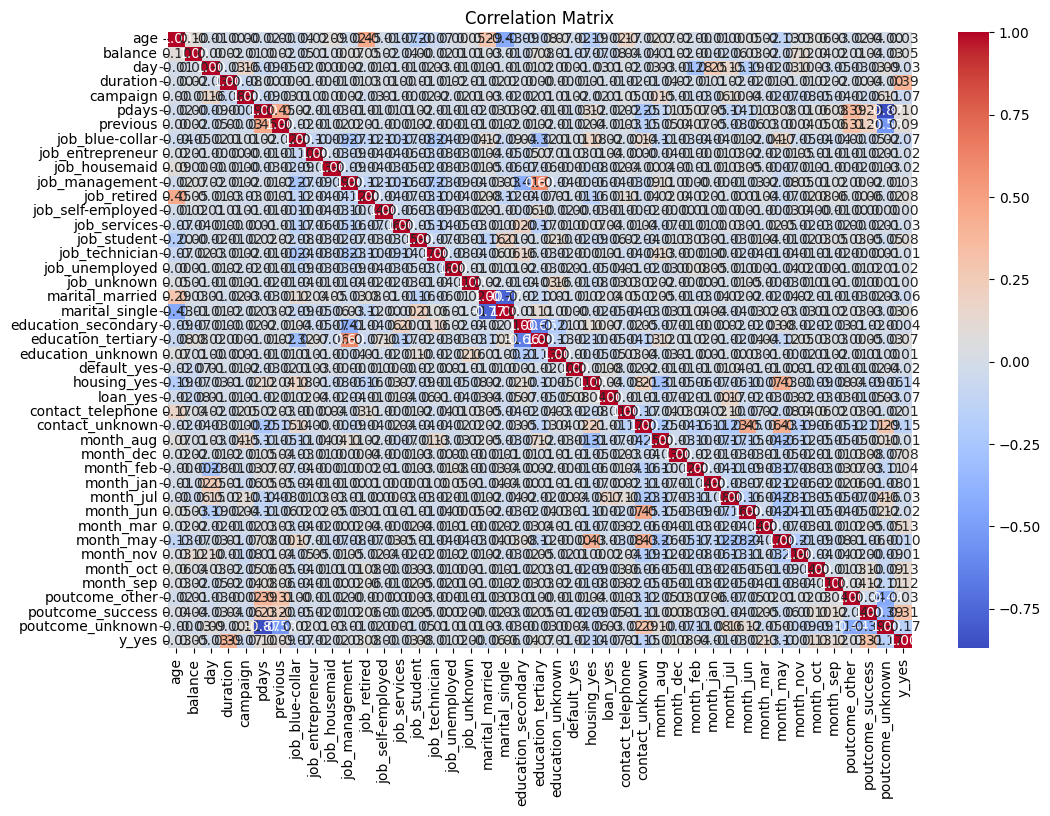

In [8]:
# Compute the correlation matrix
correlation_matrix = bank_data_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **FEATURE SELECTION :**

In [40]:
# Select features and target variable
X = bank_data_encoded.drop(['y_yes'], axis=1)
y = bank_data_encoded['y_yes']

# **TRAIN - TEST SPLIT**

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **MODEL TRAINING & EVALUATION**

In [43]:
# Initialize the classifier
clf = DecisionTreeClassifier(max_depth= 10 , max_features = None , min_samples_leaf = 10, min_samples_split = 2, random_state=42)

# Train the classifier
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

Accuracy: 0.898849896785609
Precision: 0.6082375478927203
Recall: 0.3973717146433041
F1 Score: 0.48069644208932627
[[11557   409]
 [  963   635]]


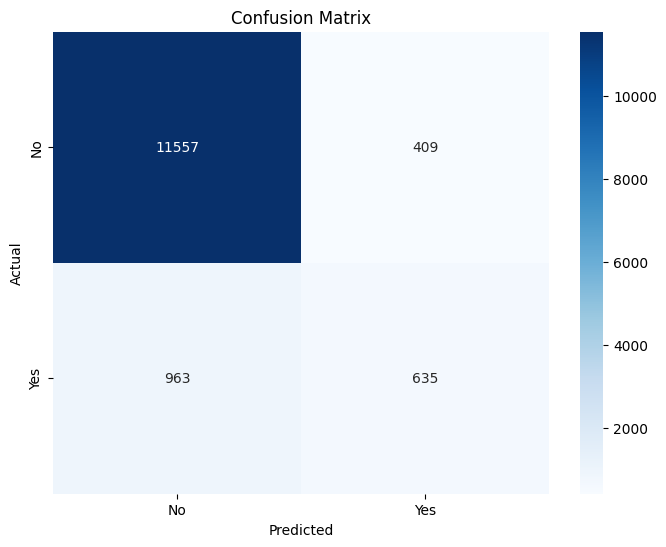

In [44]:
# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Perform cross-validation
cv_scores_acc = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_prec = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='f1')

# Print the cross-validation scores
print(f'Cross-Validation Accuracy Scores: {cv_scores_acc}')
print(f'Mean Cross-Validation Accuracy Score: {cv_scores_acc.mean()}')
print(f'Cross-Validation Precision Scores: {cv_scores_prec}')
print(f'Mean Cross-Validation Precision Score: {cv_scores_prec.mean()}')
print(f'Cross-Validation Recall Scores: {cv_scores_recall}')
print(f'Mean Cross-Validation Recall Score: {cv_scores_recall.mean()}')
print(f'Cross-Validation F1 Scores: {cv_scores_f1}')
print(f'Mean Cross-Validation F1 Score: {cv_scores_f1.mean()}')

Cross-Validation Accuracy Scores: [0.89636651 0.89699842 0.90267025 0.90314426 0.89951019]
Mean Cross-Validation Accuracy Score: 0.8997379249508957
Cross-Validation Precision Scores: [0.57824427 0.59043659 0.60892857 0.63269639 0.5984556 ]
Mean Cross-Validation Precision Score: 0.6017522851576189
Cross-Validation Recall Scores: [0.41056911 0.38430311 0.46205962 0.40379404 0.4200542 ]
Mean Cross-Validation Recall Score: 0.4161560154167171
Cross-Validation F1 Scores: [0.48019017 0.46557377 0.52542373 0.4929694  0.49363057]
Mean Cross-Validation F1 Score: 0.4915575286150878


                Feature  Importance
3              duration    0.447244
40     poutcome_success    0.218259
0                   age    0.059437
5                 pdays    0.044656
27      contact_unknown    0.032884
34            month_mar    0.029308
2                   day    0.026308
33            month_jun    0.025124
1               balance    0.023737
37            month_oct    0.019642
38            month_sep    0.015962
24          housing_yes    0.010013
4              campaign    0.008445
35            month_may    0.006298
20  education_secondary    0.006070
18      marital_married    0.006027
21   education_tertiary    0.004355
6              previous    0.004249
28            month_aug    0.002786
36            month_nov    0.002292
7       job_blue-collar    0.001889
25             loan_yes    0.001575
30            month_feb    0.001064
19       marital_single    0.000878
10       job_management    0.000759
15       job_technician    0.000741
17          job_unknown    0

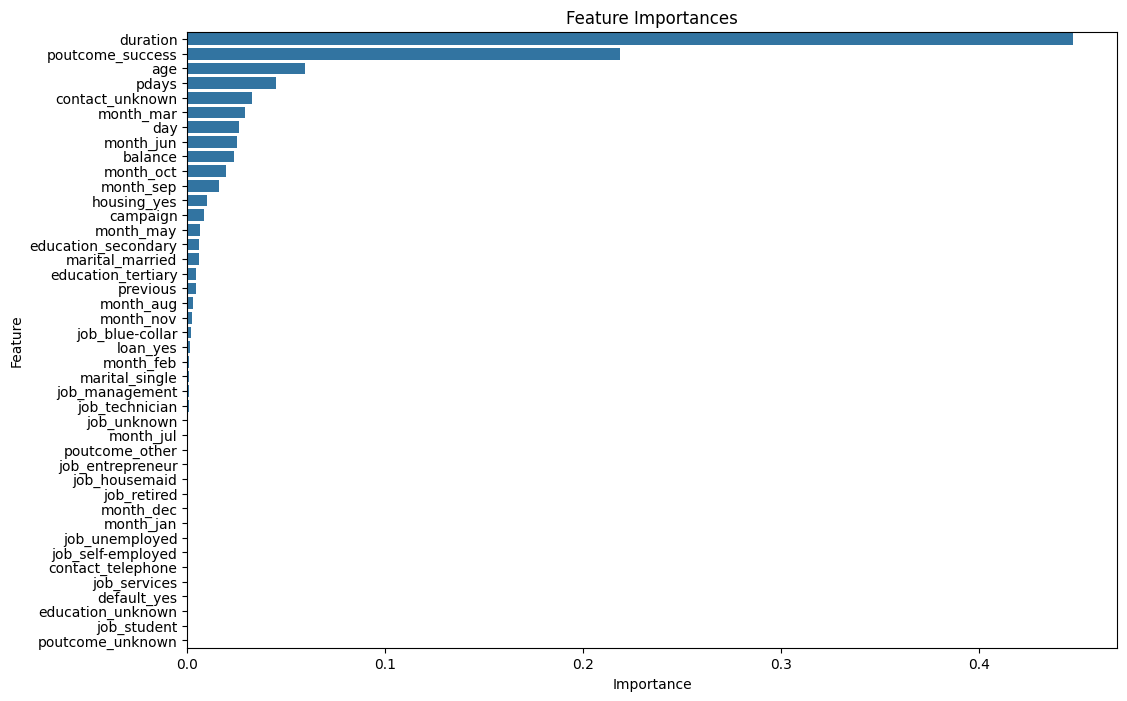

In [46]:
# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

**No Tuning & Recall:**
Accuracy: 87.2014;
Precision: 45.7459;
Recall: 46.4330;
F1 Score: 46.0869;

[[11086   880]

 [  856   742]]

**F1 :** Accuracy: 89.8923;
Precision: 59.2804;
Recall: 45.3692;
F1 Score: 51.4002;

[[11468   498]

 [  873   725]]

**Accuracy :** Accuracy: 89.8923;
Precision: 60.8612;
Recall: 39.7997;
F1 Score: 48.1271;

[[11557   409]

 [  962   636]]

**Precision :** Accuracy: 89.4795;
Precision: 60.8917;
Recall: 29.9123;
F1 Score: 40.1174;

[[11659   307]

 [ 1120   478]]

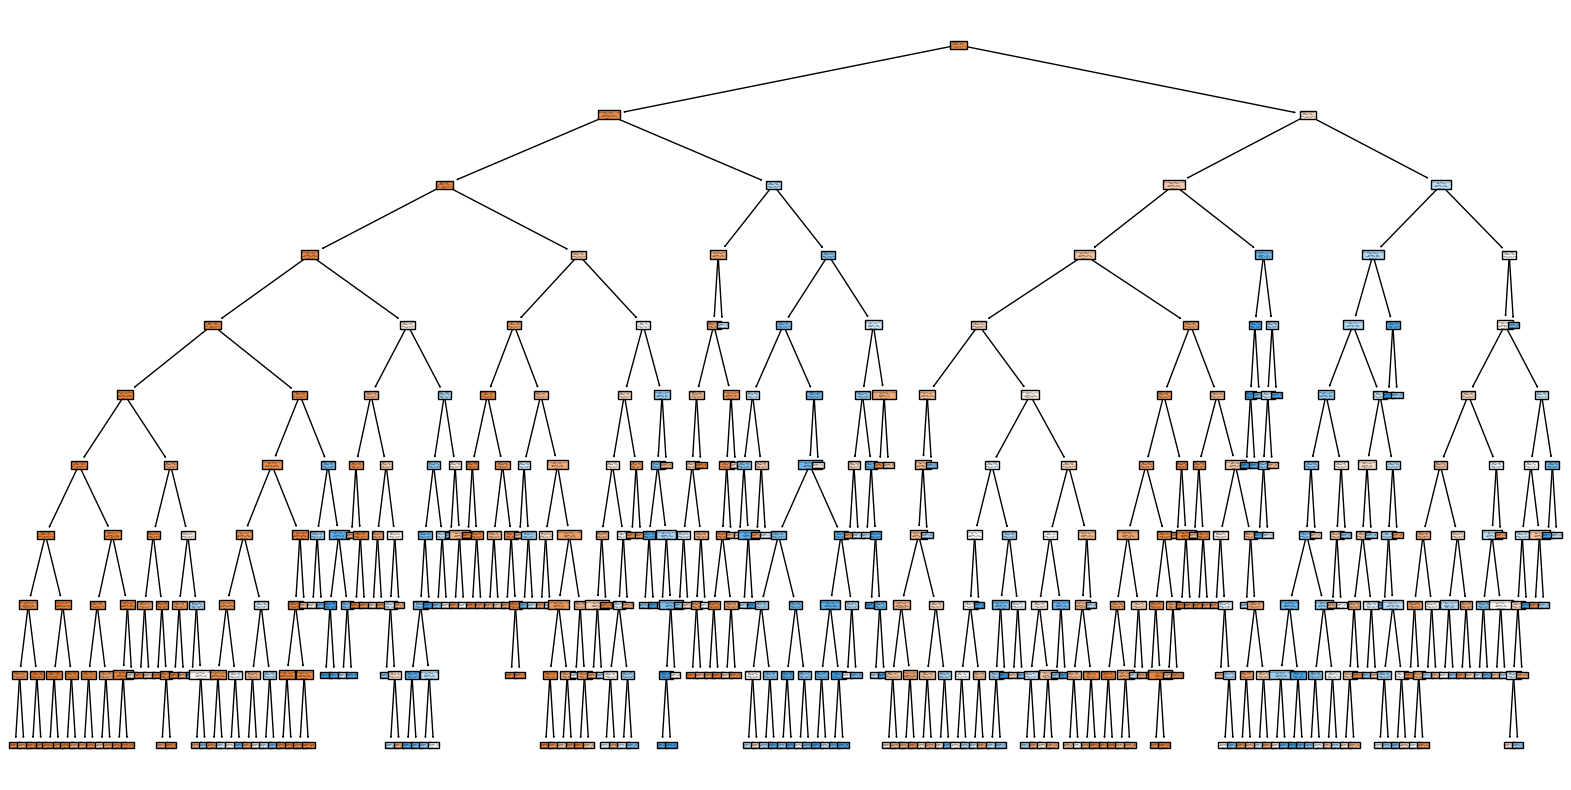

In [47]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

# **HYPER-PARAMETER TUNING**

In [17]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Use the best estimator
best_clf = grid_search.best_estimator_


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


# **SMOTE**

Accuracy: 0.8605131229725744
Precision: 0.43066037735849055
Recall: 0.5713391739674594
F1 Score: 0.4911242603550296
[[10759  1207]
 [  685   913]]


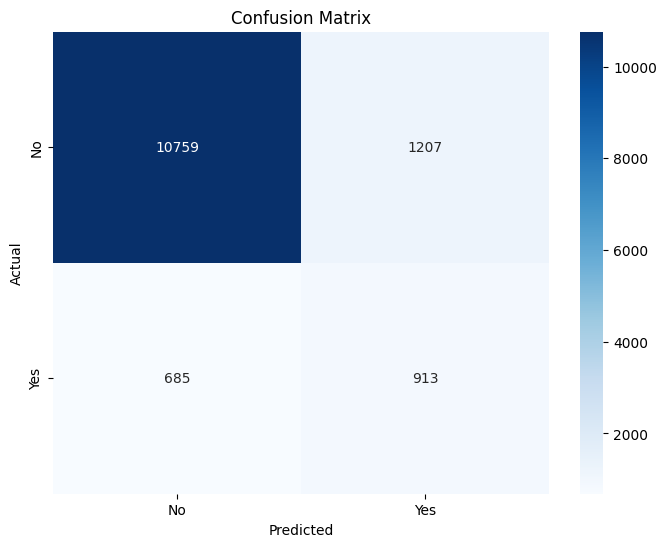

In [48]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the classifier
clf1 = DecisionTreeClassifier(max_depth= 20 , max_features = None , min_samples_leaf = 1, min_samples_split = 2, random_state=42)

# Train the model on the resampled dataset
clf1.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_s = clf1.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_s = accuracy_score(y_test, y_pred_s)
precision_s = precision_score(y_test, y_pred_s)
recall_s = recall_score(y_test, y_pred_s)
f1_s = f1_score(y_test, y_pred_s)

# Print evaluation metrics
print(f'Accuracy: {accuracy_s}')
print(f'Precision: {precision_s}')
print(f'Recall: {recall_s}')
print(f'F1 Score: {f1_s}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_s)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=clf1, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print(grid_search.best_params_)

# Use the best estimator
best_clf = grid_search.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Best Accuracy : 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2

Best Precision : 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5

Best Recall : 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2

f1 : 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2